# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
#%matplotlib inline
#from IPython.core.pylabtools import figsize
#figsize(12, 8)
#sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [25]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [6]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [120]:
def q1():
    a = get_sample(athletes,'height',3000, 42)
    Ws, ps = sct.shapiro(a)
    print('Statistics=%.3f, p=%.3f' % (Ws, ps))
    alpha = 0.05
    
    if ps < alpha:
        b = False
    else:
        b = True
    return bool(b)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

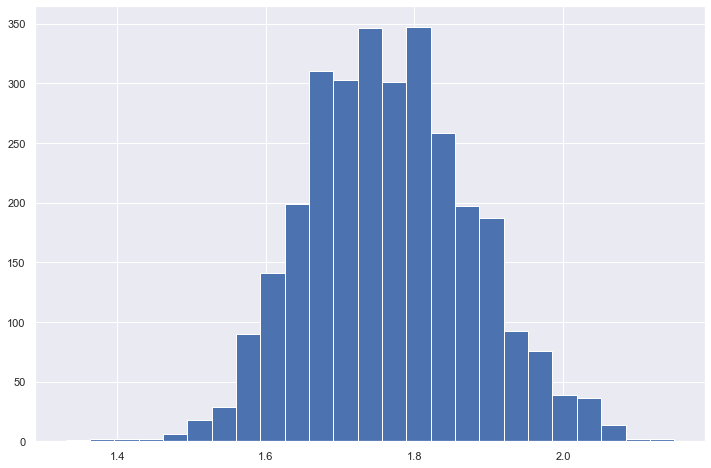

In [61]:
#r = get_sample(athletes,'height',3000, 42)
#plt.hist(r, bins=25)
#plt.plot

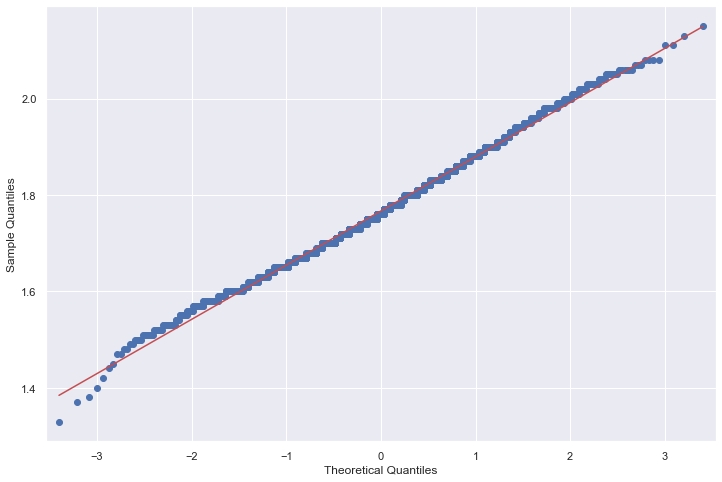

In [55]:
#from statsmodels.graphics.gofplots import qqplot
#from matplotlib import pyplot
#qqplot(r, line='s')
#pyplot.show()

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que? 
R: Não, o formato apresentado pelo gráfico é de uma distribuição gaussiana.
* Plote o qq-plot para essa variável e a analise. 
R: Como explicado anteriormente, por formar uma distribuição gaussiana, veja que os pontos se aproxiam muito da diagonal padrão de distribuição gaussinaa
* Existe algum nível de significância razoável que  nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [111]:
def q2():
    a = get_sample(athletes,'height',3000, 42)
    stjb, pjb = sct.jarque_bera(a)
    print('Statistics=%.3f, p=%.3f' % (stjb, pjb))
    alpha = 0.05
    
    if pjb < alpha:
        bjb = False
    else:
        bjb = True
    return bool(bjb)

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [105]:
def q3():
    a = get_sample(athletes,'weight',3000, 42)
    stn, pn = sct.normaltest(a)
    print('Statistics=%.3f, p=%.3f' % (stn, pn))
    alpha = 0.05
    
    if pn < alpha:
        bnt = False
    else:
        bnt = True
    return bool(bnt)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [123]:
def q4():
    a = get_sample(athletes,'weight',3000, 42)
    log = sct.boxcox(a)
    log = pd.DataFrame(log[0])
    
    stn, pn = sct.normaltest(log)
    print('Statistics=%.3f, p=%.3f' % (stn, pn))
    alpha = 0.05
    
    if pn > alpha:
        bnt = False
    else:
        bnt = True
    return bool(bnt)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [169]:
def q5():
    bra = athletes.loc[athletes['nationality'] == 'BRA']
    bra_mean = bra['height']
    
    usa = athletes.loc[athletes['nationality'] == 'USA']
    usa_mean = usa['height']
    
    ttest, ptest = sct.ttest_ind(bra_mean, usa_mean,nan_policy='omit',equal_var=False)
    
    alpha = 0.05
    
    if ptest < alpha:
        btest = False
    else:
        btest = True

    return bool(btest)

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [171]:
def q6():
    can = athletes.loc[athletes['nationality'] == 'CAN']
    can_mean = can['height']
    
    bra = athletes.loc[athletes['nationality'] == 'BRA']
    bra_mean = bra['height']
    
    ttest, ptest = sct.ttest_ind(bra_mean, can_mean,nan_policy='omit',equal_var=False)
    
    alpha = 0.05
    
    if ptest < alpha:
        btest = False
    else:
        btest = True

    return bool(btest)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [ ]:
#C:\Users\Rachid Elihimas\codenation\data-science-2\test_submit.py:37: assert 0.00042584 == 0.00046601

In [172]:
def q7():
    can = athletes.loc[athletes['nationality'] == 'CAN']
    can_mean = can['height']
    
    usa = athletes.loc[athletes['nationality'] == 'USA']
    usa_mean = usa['height']
    
    ttest, ptest = sct.ttest_ind(can_mean, usa_mean,nan_policy='omit',equal_var=False)

    ptest = round(ptest,8)
    
    return float(ptest)

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?